In [2]:
#Q1
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Define species names
species_names = penguins['species'].unique()

# Create a histogram for each species
for species in species_names:
    df_species = penguins[penguins['species'] == species]
    
    # Filter out NaN values for flipper_length_mm
    flipper_lengths = df_species['flipper_length_mm'].dropna()
    
    # Calculate location metrics
    mean_flipper = flipper_lengths.mean()
    median_flipper = flipper_lengths.median()
    
    # Calculate scale metrics
    min_flipper = flipper_lengths.min()
    max_flipper = flipper_lengths.max()
    iqr_flipper = np.percentile(flipper_lengths, 75) - np.percentile(flipper_lengths, 25)
    lower_quartile = np.percentile(flipper_lengths, 25)
    upper_quartile = np.percentile(flipper_lengths, 75)
    std_flipper = flipper_lengths.std()
    two_std_lower = mean_flipper - 2 * std_flipper
    two_std_upper = mean_flipper + 2 * std_flipper
    
    # Create histogram
    fig = px.histogram(df_species, x="flipper_length_mm", nbins=30, title=f"{species} Flipper Length")
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='blue', dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color='green', dash='dash'), annotation_text="Median", annotation_position="top right")
    
    # Add vertical rectangle for range
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="red", opacity=0.1, line_width=0, annotation_text="Range", annotation_position="top left")
    
    # Add vertical rectangle for interquartile range (IQR)
    fig.add_vrect(x0=lower_quartile, x1=upper_quartile, fillcolor="yellow", opacity=0.2, line_width=0, annotation_text="IQR", annotation_position="top left")
    
    # Add vertical rectangle for ±2 standard deviations
    fig.add_vrect(x0=two_std_lower, x1=two_std_upper, fillcolor="purple", opacity=0.1, line_width=0, annotation_text="±2 Std", annotation_position="top left")
    
    # Show plot
    fig.show()


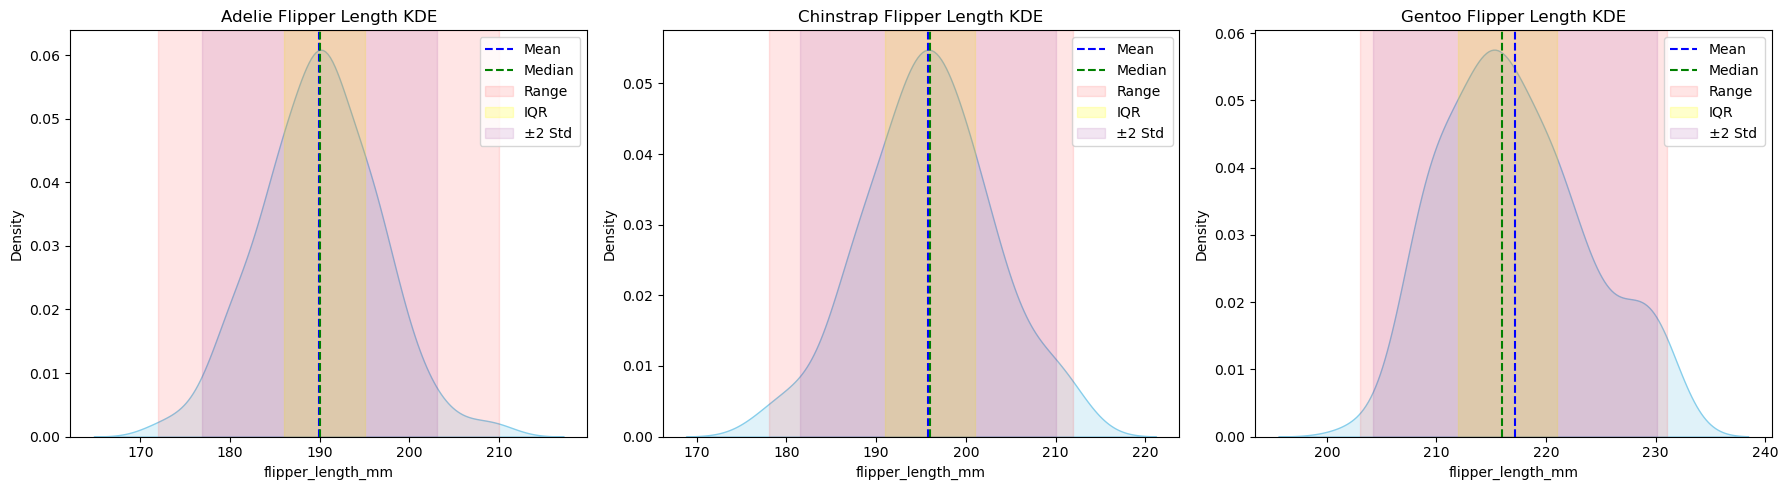

In [3]:
#Q2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Define species names
species_names = penguins['species'].unique()

# Create a 1x3 row of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterate through species and plot KDE for each
for i, species in enumerate(species_names):
    df_species = penguins[penguins['species'] == species]
    
    # Filter out NaN values for flipper_length_mm
    flipper_lengths = df_species['flipper_length_mm'].dropna()
    
    # Calculate location metrics
    mean_flipper = flipper_lengths.mean()
    median_flipper = flipper_lengths.median()
    
    # Calculate scale metrics
    min_flipper = flipper_lengths.min()
    max_flipper = flipper_lengths.max()
    iqr_flipper = np.percentile(flipper_lengths, 75) - np.percentile(flipper_lengths, 25)
    lower_quartile = np.percentile(flipper_lengths, 25)
    upper_quartile = np.percentile(flipper_lengths, 75)
    std_flipper = flipper_lengths.std()
    two_std_lower = mean_flipper - 2 * std_flipper
    two_std_upper = mean_flipper + 2 * std_flipper
    
    # Plot KDE for the species
    sns.kdeplot(flipper_lengths, ax=axes[i], fill=True, color="skyblue")
    axes[i].set_title(f"{species} Flipper Length KDE")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper, color='green', linestyle='--', label='Median')
    
    # Add shaded areas for scale metrics
    # Highlight the range (min to max)
    axes[i].axvspan(min_flipper, max_flipper, color='red', alpha=0.1, label='Range')
    
    # Highlight the interquartile range (IQR)
    axes[i].axvspan(lower_quartile, upper_quartile, color='yellow', alpha=0.2, label='IQR')
    
    # Highlight ±2 standard deviations from the mean
    axes[i].axvspan(two_std_lower, two_std_upper, color='purple', alpha=0.1, label='±2 Std')

    # Add legend
    axes[i].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


Q3
1. Box Plots:
Purpose: Box plots summarize the distribution of data through key descriptive statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. They are excellent for comparing distributions across multiple categories.
Description: A box plot displays a rectangular "box" between Q1 and Q3, with a line representing the median. Whiskers extend from the box to the minimum and maximum values, and outliers are often represented as individual points.
Strengths:
Clear representation of spread, skewness, and outliers.
Ideal for summarizing key statistical metrics like the IQR and range.
Compact and easy to interpret, especially for comparing multiple categories.
Weaknesses:
Limited in showing the detailed shape of the distribution (e.g., modality or tails).
Doesn't provide information about the frequency of data points.
Best For: Comparing multiple distributions, summarizing key statistics, identifying outliers, and understanding the central tendency and spread of data.


2. Histograms:
Purpose: Histograms visualize the frequency distribution of data by dividing the data into bins and counting how many data points fall into each bin. This method shows the distribution’s shape, including any peaks or clusters.
Description: A histogram is a bar plot where the height of each bar corresponds to the count (or frequency) of data points within a specific bin range. The x-axis represents the data values, and the y-axis shows the count.
Strengths:
Effectively shows the shape and modality of the data distribution (e.g., whether it’s unimodal, bimodal, etc.).
Visualizes skewness and the spread of the data.
Can indicate gaps, clusters, or unusual patterns in data.
Weaknesses:
The appearance of the histogram (bin width, number of bins) is sensitive to the bin size, which can affect interpretation.
It gives a rough sense of distribution but lacks smoothness for exact distribution analysis.
Best For: Understanding the distribution's shape, modality, and how frequently data values appear.


3. Kernel Density Estimators (KDE):
Purpose: KDE plots estimate the probability density function of a continuous random variable. Unlike histograms, they provide a smoothed representation of the data’s distribution, making it easier to understand the underlying distribution without the influence of bin size.
Description: A KDE plot is a smooth curve that represents the density of data points along the x-axis. The area under the curve represents the probability of data points falling within that range, similar to a smoothed histogram.
Strengths:
Smooth representation of the data distribution, offering a clearer picture of the underlying probability density.
Excellent for identifying the exact shape of the distribution, including subtle variations and multiple peaks.
Avoids the issue of bin size sensitivity found in histograms.
Weaknesses:
More abstract than histograms or box plots, which can be less intuitive for some users.
Choosing the bandwidth (smoothing parameter) can significantly affect the visualization, with too much smoothing hiding details and too little producing a noisy plot.
Best For: Visualizing the smooth shape of the distribution, especially when the focus is on continuous data and understanding the underlying probability density.


I prefer Histograms because it shows the distribution’s shape, so that I can more intuitively understand the distribution of data. And I think Histograms is quite friendly to a beginner because I can easily understand how it works and its mean ,mode and median

SUMMARY
Session 1: Plotly Histograms with Location and Scale Markers
Objective: The user asked to create Plotly histograms for the flipper_length_mm variable from the penguins dataset. The task involved marking the location (mean and median) and scale (range, interquartile range, and ±2 standard deviations from the mean) using vertical lines and shaded rectangles.
Approach:
Histograms were created using plotly.express.
add_vline() was used to add vertical lines for the mean and median.
add_vrect() was used to highlight the range, interquartile range, and ±2 standard deviations.
Outcome: A detailed approach was provided to plot histograms for each penguin species, visually marking the location and scale metrics on each plot.
Session 2: Seaborn KDE Plots with Location and Scale Markers
Objective: The user transitioned to KDE plots, asking for a similar analysis as in Session 1, but using Seaborn’s KDE to visualize the distributions, organized into a row of three plots (one for each penguin species).
Approach:
KDE plots were created using sns.kdeplot() from Seaborn.
axvline() was used to add vertical lines for the mean and median.
axvspan() was used to shade areas representing the range, IQR, and ±2 standard deviations from the mean.
The plots were arranged in a row using Matplotlib's plt.subplots().
Outcome: The KDE-based plots provided smooth representations of the distribution of flipper_length_mm, with clearly marked location and scale metrics.
Session 3: Comparison of Box Plots, Histograms, and KDE Plots
Objective: The user requested a comparison of three visualization methods: box plots, histograms, and kernel density estimators (KDE), to understand their differences and use cases.
Approach:
Each method was described in detail, covering its purpose, key visual features, strengths, and weaknesses.
The methods were compared in terms of modality, shape detail, spread/range, and ease of interpretation.
Outcome: A comprehensive comparison was provided, highlighting that:
Box plots are great for summarizing key statistics and comparing categories.
Histograms are ideal for visualizing frequency distributions, but sensitive to bin width.
KDE plots provide smooth representations of the underlying data distribution but are abstract and require careful interpretation.
https://chatgpt.com/share/66f4541f-ba54-8000-8a27-5abba31e61cf

In [4]:
#Q4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

data2 and data4 have similar means and imilar variances
data1, data2, and data3 have similar means but quite different variances
data1 and data3 have similar variances but quite different means
data4 and data1 have quite different means and quite different variances

Q5
1. Right Skewness (Positively Skewed)
In a right-skewed distribution:

Tail: The longer tail is on the right side, meaning that there are relatively few larger values that pull the distribution to the right.

Mean vs. Median: The mean is greater than the median.

Why?

The mean is affected by extreme values (since it takes into account all data points), so the presence of high outliers in the right tail pulls the mean higher than the median.
The median, being the middle value, is less influenced by these extreme values and tends to be closer to the bulk of the data on the left side.
Example: Income distribution in many countries is right-skewed—while most people earn moderate incomes, a few very high incomes pull the mean above the median.

2. Left Skewness (Negatively Skewed)
In a left-skewed distribution:

Tail: The longer tail is on the left side, meaning there are relatively few smaller values that pull the distribution to the left.

Mean vs. Median: The mean is less than the median.

Why?

The mean is again affected by extreme values, but this time the outliers on the left (lower values) pull the mean down.
The median is more resistant to these low outliers, and thus remains closer to the bulk of the data on the right side.
Example: Test scores where most students perform well but a few score very poorly can lead to left skewness.

3. Symmetrical Distribution
In a perfectly symmetrical distribution:

Tail: There are no tails that skew one way or the other.

Mean vs. Median: The mean is equal to the median.

Why?

Both measures of central tendency are located at the center of the distribution since there is no skewness to pull the mean away from the median.

In [8]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

for Right Skewness (Positively Skewed), the mean is greater than the median
for Left Skewness (Negatively Skewed), The mean is less than the median.
for Symmetrical Distribution, the mean is equal to the median

SUMMARY

Right Skewness (Positively Skewed):
Tail: Longer on the right.
Relationship: Mean > Median.
Reason: High outliers pull the mean up more than the median.

Left Skewness (Negatively Skewed):
Tail: Longer on the left.
Relationship: Mean < Median.
Reason: Low outliers pull the mean down more than the median.

Symmetrical Distribution:
Tail: No skew.
Relationship: Mean = Median.
Reason: Balanced distribution with no extreme values.

Key Insight:
The mean is sensitive to extreme values (outliers), while the median is more robust, which leads to the observed relationships in skewed distributions.
https://chatgpt.com/share/66f45b3c-0cb0-8000-a436-900678542025

In [9]:
#Q6
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


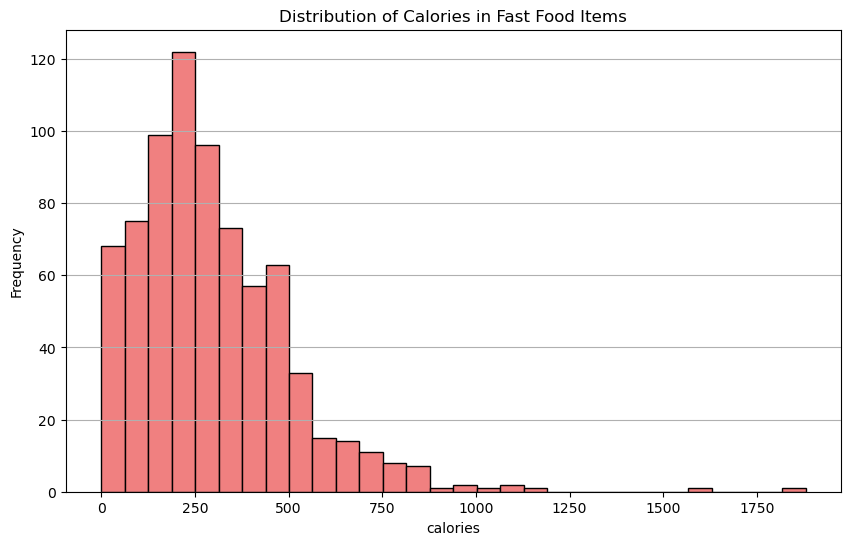

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('calories')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


I use the Histogram and try to visualize it. And I found that this data is  Right Skewness (Positively Skewed), whose mean is greater than the median.The mode is around 250 .


In [12]:
#Q7
import pandas as pd
import plotly.express as px
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
df = pd.read_csv(url)
fig = px.scatter(df, 
                 x='gdpPercap', 
                 y='lifeExp', 
                 animation_frame='year', 
                 animation_group='country', 
                 size='pop', 
                 color='continent', 
                 hover_name='country', 
                 log_x=True, 
                 size_max=60, 
                 range_x=[100, 100000], 
                 range_y=[20, 90],
                 title='Gapminder: GDP per Capita vs Life Expectancy')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title=dict(font=dict(size=24)), 
                  xaxis_title='GDP per Capita', 
                  yaxis_title='Life Expectancy')
fig.show()


In [15]:
#Q8
import pandas as pd
import plotly.express as px
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
df = pd.read_csv(url)
df['percent_change'] = df.groupby('country')['gdpPercap'].pct_change()
df['rank'] = df.groupby('year')['gdpPercap'].rank(method='first')
fig = px.scatter(df, 
                 x='percent_change',  
                 y='rank',          
                 animation_frame='year', 
                 animation_group='country', 
                 hover_name='country', 
                 size='pop',     
                 color='continent',  
                 size_max=50, 
                 range_x=[-0.005, 0.005], 
                 title='Gapminder: Percent Change of GDP per Capita vs Rank Over Years')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title=dict(font=dict(size=24)), 
                  xaxis_title='Percent Change', 
                  yaxis_title='Rank')
fig.show()


Q9
Yes